# Aufgabe 2: Datenexploration, deskriptive Statistik und Ausreißer
Analysiert werden soll der Datensatz Bodyfat.csv.  
Dieser besteht aus verschiedenen Messungen des Körperumfangs sowie Schätzungen des Körperfettanteils mittels Messung der Körperdichte von 252 Männern.

Der Datensatz enthält folgende Variablen:
- Density (g/cm³): Körperdichte
- Bodyfat (%): Körperfettanteil, geschätzt mittels Siris Gleichung
- Age (Jahr)
- Height (Zoll, später umgerechnet in cm)
- Weight (Pfund, später umgerechnet in kg)
- Umfang verschiedener Körperteile in Zentimeter

Zu beachten sind insbesondere die unterschiedlichen Einheiten von Körpergröße (Zoll) und Körperteilumfang (Zentimeter).

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Daten Laden und Vorbereiten
Die nächste Zelle dient zum Upload des Datensatzes Bodyfat.csv:

In [0]:
from google.colab import files
files.upload()

Saving Bodyfat.csv to Bodyfat.csv


{'Bodyfat.csv': b'"Density","bodyfat","Age","Weight","Height","Neck","Chest","Abdomen","Hip","Thigh","Knee","Ankle","Biceps","Forearm","Wrist"\n1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59,37.3,21.9,32,27.4,17.1\n1.0853,6.1,22,173.25,72.25,38.5,93.6,83,98.7,58.7,37.3,23.4,30.5,28.9,18.2\n1.0414,25.3,22,154,66.25,34,95.8,87.9,99.2,59.6,38.9,24,28.8,25.2,16.6\n1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2\n1.034,28.7,24,184.25,71.25,34.4,97.3,100,101.9,63.2,42.2,24,32.2,27.7,17.7\n1.0502,20.9,24,210.25,74.75,39,104.5,94.4,107.8,66,42,25.6,35.7,30.6,18.8\n1.0549,19.2,26,181,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7\n1.0704,12.4,25,176,72.5,37.8,99.6,88.5,97.1,60,39.4,23.2,30.5,29,18.8\n1.09,4.1,25,191,74,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2\n1.0722,11.7,23,198.25,73.5,42.1,99.6,88.6,104.1,63.1,41.7,25,35.6,30,19.2\n1.083,7.1,26,186.25,74.5,38.5,101.5,83.6,98.2,59.7,39.7,25.2,32.8,29.4,18.5\n1.0812,7.8,27,216,76,39.4,103

Nach dem Einlesen des Datensatzes konvertieren wir die Werte Körpergröße und Gewicht in metrische Einheiten, um diese als Europäer intuitiv verstehen zu können.

In [0]:
data = pd.read_csv("Bodyfat.csv")
data['Height'] *= 2.54   # Convert Height to cm
data['Weight'] *= 0.454  # Convert Weight to kg

data

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,70.0295,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,78.6555,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,69.9160,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.8765,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,83.6495,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,60.9495,170.180,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,91.2540,177.165,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,84.7845,167.640,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,86.6005,179.070,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


## Deskriptive Statistik

Wir berechnen zunächst folgende Statisitken:
- Durchschnitt (gibt die zentrale Tendenz der Verteilung an)
- Median (gibt den mittleren Wert im Datensatz an)
- Quantil
- Modus (gibt den/die am häufigsten auftretenden Wert an)
- Spannweite

Zusätzlich berechnen wir:
- Standardabweichung (gibt die Streuung der Verteilung an)
- Paarweise empirische Korrelation (lineare Zusammenhänge zwischen einzelnen Variablen)

Die folgende Tabelle zeigt Durchschnitt (Mean), Median (0.5-Quantil), 0.25-Quantil und 0.75-Quantil sowie Standardabweichung (std):

In [0]:
data.describe()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,81.231680,178.177976,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,13.342679,9.303654,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,53.799000,74.930000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,72.186000,173.355000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,80.131000,177.800000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,89.438000,183.515000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,164.870100,197.485000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


Die Spannweite kann als Differenz zwischen dem größten und kleinsten Wert berechnet werden:

In [0]:
data.max() - data.min()

Density      0.1139
bodyfat     47.5000
Age         59.0000
Weight     111.0711
Height     122.5550
Neck        20.1000
Chest       56.9000
Abdomen     78.7000
Hip         62.7000
Thigh       40.1000
Knee        16.1000
Ankle       14.8000
Biceps      20.2000
Forearm     13.9000
Wrist        5.6000
dtype: float64

In [0]:
data.mode()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.061,20.4,40.0,69.1215,181.61,38.5,99.1,88.7,98.3,58.9,39.0,22.0,30.5,27.3,18.8
1,NaN,NaN,NaN,75.8180,NaN,NaN,102.7,89.7,NaN,NaN,NaN,22.5,31.6,29.6,NaN
2,NaN,NaN,NaN,76.2720,NaN,NaN,NaN,100.5,NaN,NaN,NaN,22.6,NaN,29.8,NaN
3,NaN,NaN,NaN,76.3855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,77.5205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,78.4285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,80.4715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,81.6065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,83.6495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data['Weight'].value_counts()

76.3855    3
78.4285    3
75.8180    3
77.5205    3
69.1215    3
          ..
74.5695    1
67.5325    1
67.3055    1
84.1035    1
56.7500    1
Name: Weight, Length: 197, dtype: int64

Wir visualisieren die Verteilung der einzelnen Variablen in Boxplots:

Density       AxesSubplot(0.125,0.125;0.133621x0.755)
bodyfat    AxesSubplot(0.285345,0.125;0.133621x0.755)
Age         AxesSubplot(0.44569,0.125;0.133621x0.755)
Weight     AxesSubplot(0.606034,0.125;0.133621x0.755)
Height     AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

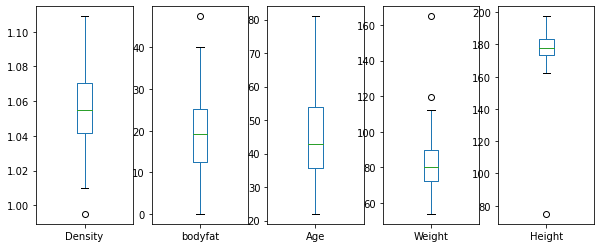

In [0]:
data[["Density", "bodyfat", "Age", "Weight", "Height"]].plot.box(figsize=(10, 4), subplots=True)

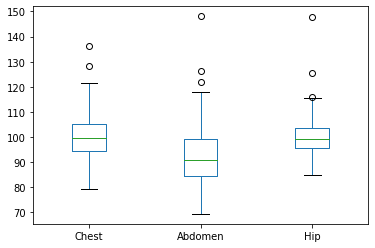

In [0]:
data.iloc[:, 6:9].plot.box()

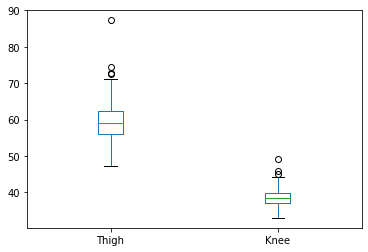

In [0]:
data.iloc[:, 9:11].plot.box()

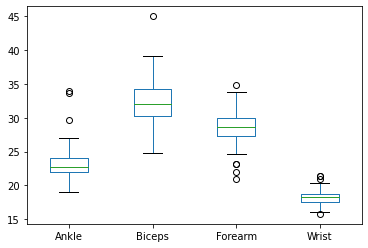

In [0]:
data.iloc[:, 11:].plot.box()

Die paarweise empirische Korrelation (lineare Abhängigkeit) visualisieren wir in einer Heatmap:

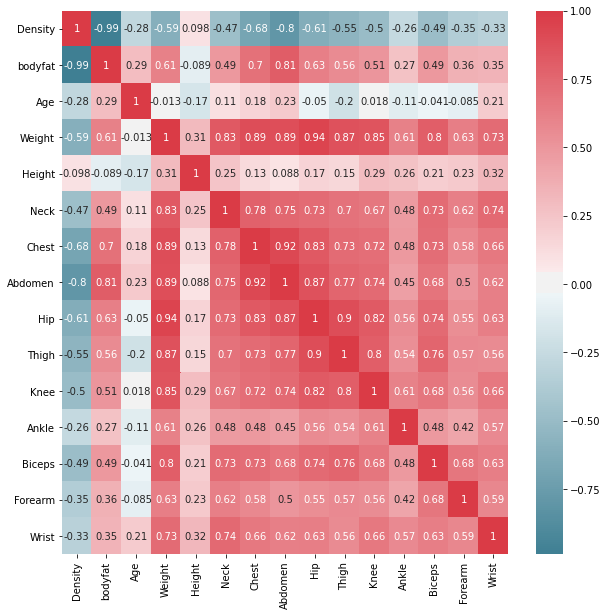

In [0]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrMatrix, annot=True, cmap=cmap)
plt.show()

Es ist deutlich zu erkennen, dass zwischen den einzelnen Körperteil-Umfängen wie zu erwarten eine deutliche Korrelation besteht. Auch zum Gewicht besteht hier ein deutlicher Zusammenhang.  
Das Alter hat hingegen nur schwache Zusammenhänge mit den restlichen Variablen.  
Der Körperfettanteil korreliert insbesondere mit dem Bauchumfang, Hüftumfang und dem Gewicht, außerdem besteht ein starker negativer Zusammenhang zur Körperdichte.

## Ausreißer (Outlier)

Outlier sind Datenpunkte, die sich signifikant von anderen Beobachtungen unterscheiden.  
Im Wesentlichen werden zwei Typen von Ausreißern unterschieden: Datenfehler und wahre Ausreißer.
Datenfehler können unter anderem durch Messfehler, Variabilität in den Messungen oder generelle Fehler im experimentellen Aufbau entstehen.
Wahre Ausreißer sind tatsächlich Teil der Population und können z.B. durch Populationen mit schweren Rändern oder Messungen aus einer Mischung mehrerer Verteilungen entstehen, aber selbst bei einer Normalverteilung sind sie durch reinen Zufall möglich.

Als Ausreißer werden in der Statistik häufig alle Werte angesehen, die mehr als 1,5 Mal den Quartilsabstand über dem oberen Quartil bzw. unter dem unteren Quartil liegen (siehe z.B. Norbert Henze, Stochastik für Einsteiger, S. 33).

Die Ausreißer in unserem vorliegenden Datensatz kann man in den Boxplots sehen: Die Whisker zeigen den Wertebereich aller normalen Beobachtungen, die Kreise stehen für vereinzelte Ausreißer-Datenpunkte.

Ausreißer können die Analyse-Ergebnisse von nicht robusten Statistiken verfälschen und damit zu fehlerhaften Aussagen über die Population führen.
Median, Quantile und Modus sind Statistiken, die robust gegen Ausreißer sind (da der konkrete Messwert von Ausreißern nicht in die Berechnungen mit eingeht, sondern nur die Auswahl des Wertes beeinflusst).  
Durchschnitt, Spannweite, Standardabweichung und paarweise empirische Korrelation sind hingegen nicht robust gegen Ausreißer, da hier die entsprechenden Werte direkt die Berechnung beeinflussen.

Auch bei Vorhersagemodellen wie z.B. einem Regressionsmodell können Outlier zu Problemen führen: Da diese nicht den eigentlich zu modellierenden Zusammenhängen entsprechen, können sie die Parameter der Modelle verfälschen, wenn diese Daten bei der Modellbildung mit einbezogen werden.

Es gibt mehrere Methoden, um mit Ausreißern umzugehen:
- Zugehörige Datensätze löschen
- Werte auf bestimmtes Intervall beschneiden (kappen)
- Werte durch Mittelwert ersetzen

In unserem vorliegenden Datensatz entfernen wir zunächst die Ausreißer beim Körpergewicht und Körpergröße, da diese (sofern es sich nicht um Messfehler handelt) nicht Maßgeblich für "Normale" Menschen sind sondern von stark Übergewichtigen bzw. Kleinwüchsigen Menschen stammen.

In [0]:
data[data['Weight'] > 115]

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
38,1.0202,35.2,46,164.8701,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
40,1.0217,34.5,45,119.2885,174.625,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4


In [0]:
data = data[data['Weight'] <= 115]
data = data[data['Height'] >= 140]
data.index.size

249

Density       AxesSubplot(0.125,0.125;0.133621x0.755)
bodyfat    AxesSubplot(0.285345,0.125;0.133621x0.755)
Age         AxesSubplot(0.44569,0.125;0.133621x0.755)
Weight     AxesSubplot(0.606034,0.125;0.133621x0.755)
Height     AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

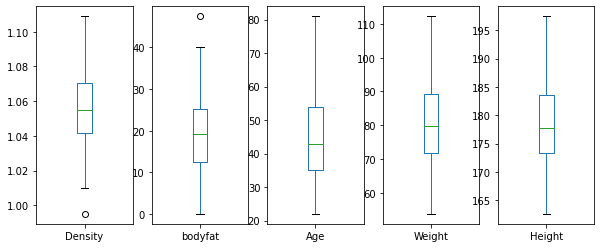

In [0]:
data[["Density", "bodyfat", "Age", "Weight", "Height"]].plot.box(figsize=(10, 4), subplots=True)

Der Ausreißer mit dem hohen Körperfettanteil entspricht auch der niedrigen Körperdichte. Dies spricht für einen tatsächlichen "echten Ausreißer" und keinen Messfehler, daher behalten wir diese Werte unverändert bei.

In [0]:
data[data['bodyfat'] > 42]

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
215,0.995,47.5,51,99.426,162.56,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


Das Vorgehen bezüglich der restlichen Ausreißer hängt von den Zielen der weiteren Analyse ab. Da an dieser Stelle zunächst keine weiteren Analysen durchgeführt werden, entscheiden wir uns dafür, die Ausreißer beizubehalten.  
Falls z.B. ein Regressionsmodell für die Vorhersage des Körperfettanteils trainiert werden sollte, so müsste anhand von Testdaten untersucht werden, ob das Entfernen oder Kappen der Ausreißer sich vorteilhaft auf die Modellgüte auswirkt. Allerdings unterliegen Körperproportionen in der Natur stärkeren Schwankungen, so dass es sich als sinnvoller erweisen könnte, die Ausreißer zu beahlten und weitere Daten zu sammeln, um das Modell zu verbessern.

Abgesehen von Ausreißern können weitere Aspekte die Ergebnisse, die Gültigkeit eines statistischen oder maschinell lernenden Modells und die Genauigkeit der Vorhersage beeinflussen. Einige dieser Aspekte sind:
- Underfitting: Modelle mit einer zu geringen Komplexität können komplexe Zusammenhänge nicht vollständig erfassen und modellieren und daher keine guten Vorhersagen erzeugen.
- Overfitting: Werden zu komplexe Modelle mit einer zu geringe Menge an Daten trainiert, so kann das Modell die einzelnen Datenpunkte "auswendig lernen" und dadurch schlechte Vorhersagen auf unbekannten Daten erzeugen.
- Bias in den Daten: Wird z.B. ein Klassifikator für Pinguine trainiert und dabei als positive Beispiele nur Bilder mit Schneehintergrund verwendet, wird der Klassifikator nicht die Pinguine erkennen, sondern den Schnee. Bilder von Pinguinen im Zoo (ohne Schnee) werden dann falsch klassifiziert.
